# TO EXPLAIN

Data source https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads

In [1]:
from config import *
import pandas as pd
import numpy as np

In [2]:
whos

Variable       Type      Data/Info
----------------------------------
COLUMNS        list      n=16
PICKLE         str       /home/ian/data/land_regis<...>pp-complete-202103.pickle
PICKLE_PROT4   str       /home/ian/data/land_regis<...>plete-202103-prot4.pickle
RAW_DATA       str       /home/ian/data/land_regis<...>03/pp-complete-202103.csv
ROOT           str       /home/ian/data/land_registry/202103
np             module    <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
os             module    <module 'os' from '/home/<...>021/lib/python3.8/os.py'>
pd             module    <module 'pandas' from '/h<...>ages/pandas/__init__.py'>


In [3]:
#df = pd.read_csv(DATA_CSV) # 132 sec
df = pd.read_pickle(PICKLE) # 30 sec

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25836876 entries, 0 to 25836875
Data columns (total 16 columns):
 #   Column    Dtype         
---  ------    -----         
 0   tin       object        
 1   price     int64         
 2   date      datetime64[ns]
 3   postcode  object        
 4   pt        object        
 5   new       object        
 6   duration  object        
 7   paon      object        
 8   saon      object        
 9   street    object        
 10  locality  object        
 11  town      object        
 12  district  object        
 13  county    object        
 14  ppd_cat   object        
 15  status    object        
dtypes: datetime64[ns](1), int64(1), object(14)
memory usage: 3.1+ GB


In [5]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25836876 entries, 0 to 25836875
Data columns (total 16 columns):
 #   Column    Dtype         
---  ------    -----         
 0   tin       object        
 1   price     int64         
 2   date      datetime64[ns]
 3   postcode  object        
 4   pt        object        
 5   new       object        
 6   duration  object        
 7   paon      object        
 8   saon      object        
 9   street    object        
 10  locality  object        
 11  town      object        
 12  district  object        
 13  county    object        
 14  ppd_cat   object        
 15  status    object        
dtypes: datetime64[ns](1), int64(1), object(14)
memory usage: 21.4 GB


In [6]:
df.head()

,tin,price,date,postcode,pt,new,duration,paon,saon,street,locality,town,district,county,ppd_cat,status
0,{A42E2F04-2538-4A25-94C5-49E29C6C8FA8},18500,1995-01-31,TQ1 1RY,F,N,L,VILLA PARADISO,FLAT 10,HIGHER WARBERRY ROAD,TORQUAY,TORQUAY,TORBAY,TORBAY,A,A
1,{1BA349E3-2579-40D6-999E-49E2A25D2284},73450,1995-10-09,L26 7XJ,D,Y,F,6,NaN,CATKIN ROAD,LIVERPOOL,LIVERPOOL,KNOWSLEY,MERSEYSIDE,A,A
2,{E5B50DCB-BC7A-4E54-B167-49E2A6B4148B},59000,1995-03-31,BH12 2AE,D,N,F,28,NaN,ALDER ROAD,POOLE,POOLE,POOLE,POOLE,A,A
3,{81E50116-D675-4B7F-9F8D-49E2B5D43271},31000,1995-12-04,IP13 0DR,D,Y,F,NONSUCH COTTAGE,NaN,THE STREET,HACHESTON,WOODBRIDGE,SUFFOLK COASTAL,SUFFOLK,A,A
4,{B97455B9-75CB-40BB-A615-42C53683E143},95000,1995-09-22,WS14 0BE,D,N,F,FOX COVER COTTAGE,NaN,HALL LANE,LICHFIELD,LICHFIELD,LICHFIELD,STAFFORDSHIRE,A,A


In [7]:
df.price.describe()

count    2.583688e+07
mean     2.016602e+05
std      7.838686e+05
min      1.000000e+00
25%      8.000000e+04
50%      1.400000e+05
75%      2.310000e+05
max      5.943000e+08
Name: price, dtype: float64

# What if we change dtypes?

In [8]:
df_few_cols = df[['county', 'pt', 'date', 'price']]
df_few_cols.head()

,county,pt,date,price
0,TORBAY,F,1995-01-31,18500
1,MERSEYSIDE,D,1995-10-09,73450
2,POOLE,D,1995-03-31,59000
3,SUFFOLK,D,1995-12-04,31000
4,STAFFORDSHIRE,D,1995-09-22,95000


In [9]:
df_few_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25836876 entries, 0 to 25836875
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   county  object        
 1   pt      object        
 2   date    datetime64[ns]
 3   price   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 788.5+ MB


In [10]:
df_few_cols.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25836876 entries, 0 to 25836875
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   county  object        
 1   pt      object        
 2   date    datetime64[ns]
 3   price   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.4 GB


In [11]:
#df_few_cols = df[['county', 'pt', 'date', 'price']]
print(f"New dataframe has shape {df_few_cols.shape}")
# string columns are mis-represented with deep=True)
df_few_cols.memory_usage(index=False)

New dataframe has shape (25836876, 4)


county    206695008
pt        206695008
date      206695008
price     206695008
dtype: int64

In [12]:
25836876 * 8 == 206695008 # 8 bytes

True

In [13]:
df_few_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25836876 entries, 0 to 25836875
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   county  object        
 1   pt      object        
 2   date    datetime64[ns]
 3   price   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 788.5+ MB


In [14]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]') # 8byte datetime
df_few_cols.pt.dtype, df_few_cols.date.dtype, df_few_cols.price.dtype, 

(dtype('O'), dtype('<M8[ns]'), dtype('int64'))

In [15]:
df_slimmer_cols = pd.DataFrame({'county_cat': df_few_cols.county.astype('category'),
                                'pt_cat': df_few_cols.pt.astype('category'),
                                'date_cat': df_few_cols.date.astype('category'),
                                'price_i32': df_few_cols.price.astype('int32')})

In [16]:
# TIP check when doing conversions that nothing is lost
assert (df_slimmer_cols['price_i32'] == df_few_cols['price']).all() \
, "Expecting all items to have exactly the same value"

In [17]:
# ask for deep=True to get the true string cost
df_slimmer_cols.memory_usage(deep=True, index=False)

county_cat     51686761
pt_cat         25837338
date_cat       52014088
price_i32     103347504
dtype: int64

In [18]:
df_slimmer_cols.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25836876 entries, 0 to 25836875
Data columns (total 4 columns):
 #   Column      Dtype   
---  ------      -----   
 0   county_cat  category
 1   pt_cat      category
 2   date_cat    category
 3   price_i32   int32   
dtypes: category(3), int32(1)
memory usage: 222.1 MB


In [19]:
assert (df_slimmer_cols.date_cat == df_few_cols.date).all()
assert (df_slimmer_cols.county_cat == df_few_cols.county).all()
assert (df_slimmer_cols.pt_cat == df_few_cols.pt).all()
assert (df_slimmer_cols.price_i32 == df_few_cols.price).all()

df_slimmer_cols.memory_usage(index=False)

county_cat     51678944
pt_cat         25837088
date_cat       52014088
price_i32     103347504
dtype: int64

In [20]:
df_slimmer_cols.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25836876 entries, 0 to 25836875
Data columns (total 4 columns):
 #   Column      Dtype   
---  ------      -----   
 0   county_cat  category
 1   pt_cat      category
 2   date_cat    category
 3   price_i32   int32   
dtypes: category(3), int32(1)
memory usage: 222.1 MB


In [21]:
assert df_few_cols.pt.isna().any() == False, "Expecting no NaN here"

In [22]:
%time df_few_cols.pt.value_counts()

CPU times: user 2.59 s, sys: 29.2 ms, total: 2.62 s
Wall time: 2.59 s


T    7807661
S    7095005
D    5951662
F    4659506
O     323042
Name: pt, dtype: int64

In [23]:
%time df_slimmer_cols.pt_cat.value_counts()

CPU times: user 118 ms, sys: 32.2 ms, total: 150 ms
Wall time: 148 ms


T    7807661
S    7095005
D    5951662
F    4659506
O     323042
Name: pt_cat, dtype: int64

In [24]:
#%time df_few_cols.groupby('pt').size().sort_values(ascending=False)

In [25]:
%time df_slimmer_cols.groupby('pt_cat').size().sort_values(ascending=False)

CPU times: user 179 ms, sys: 56.4 ms, total: 235 ms
Wall time: 239 ms


pt_cat
T    7807661
S    7095005
D    5951662
F    4659506
O     323042
dtype: int64

In [26]:
dir(df_slimmer_cols.pt_cat.cat)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__frozen',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_add_delegate_accessors',
 '_constructor',
 '_delegate_method',
 '_delegate_property_get',
 '_delegate_property_set',
 '_dir_additions',
 '_dir_deletions',
 '_freeze',
 '_hidden_attrs',
 '_index',
 '_name',
 '_parent',
 '_reset_cache',
 '_validate',
 'add_categories',
 'as_ordered',
 'as_unordered',
 'categories',
 'codes',
 'ordered',
 'remove_categories',
 'remove_unused_categories',
 'rename_categories',
 'reorder_categories',
 'set_categories']

In [27]:
df_slimmer_cols.pt_cat.cat.categories

Index(['D', 'F', 'O', 'S', 'T'], dtype='object')

In [28]:
df_slimmer_cols.pt_cat.cat.codes.tail()

25836871    0
25836872    3
25836873    4
25836874    0
25836875    0
dtype: int8

In [29]:
df_slimmer_cols.tail()

,county_cat,pt_cat,date_cat,price_i32
25836871,KENT,D,2021-01-20,492500
25836872,KENT,S,2021-01-07,425000
25836873,KENT,T,2021-01-07,425000
25836874,KENT,D,2021-01-08,620000
25836875,KENT,D,2021-01-04,430000


In [81]:
df_slimmer_cols.iloc[0]['date_cat'].year

1995

In [30]:
#fig, ax = plt.subplots()
#res = df_slimmer_cols.query("date_cat.dt.year<2020").date_cat.dt.year.value_counts().sort_index()
#res.plot(kind="bar", ax=ax)

In [31]:
#fig, ax = plt.subplots()
#res = df_slimmer_cols.query("date_cat.dt.year==2020").date_cat.dt.month.value_counts().sort_index()
#res.plot(kind="bar", ax=ax)
#ax.set(title='Monthly sales for 2020\nNote circa 3 month reporting lag\nLockdown in March');

## groupby pt year

In [32]:
df['year'] = df.date.dt.year

In [33]:
gpby = df.groupby(['year', 'pt'])
nbr_sales_per_year = gpby.size()
# (T)erraced, (S)emi, (D)etached, (F)lat/appartment, (O)ther

In [34]:
# sort by approx display order
sorted_index = nbr_sales_per_year.unstack().mean().sort_values(ascending=False).index
nbr_sales_per_year = nbr_sales_per_year.unstack().T.loc[sorted_index].T
nbr_sales_per_year.index.name="Year"

In [35]:
nbr_sales_per_year = nbr_sales_per_year.rename(columns={'T': 'Terraced', 'S': 'Semi', 'D': 'Detached', 'F': 'Flat', 'O': 'Other'})

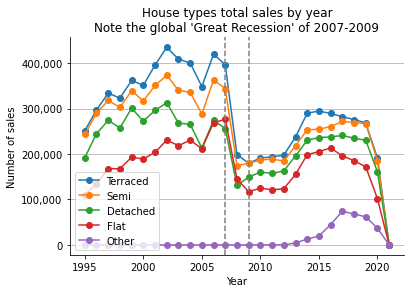

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
nbr_sales_per_year.plot(ax=ax, marker='o')
ax.set_title("House types total sales by year\nNote the global 'Great Recession' of 2007-2009")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y') # horizontal grid lines only
import matplotlib as mpl
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel("Number of sales");
ax.axvline(2007, color='grey', linestyle='--')
ax.axvline(2009, color='grey', linestyle='--')
#ax.legend(frameon=False)
plt.legend(frameon=True, loc='lower left') ;

# Paon

In [37]:
def c(item):
    try:
        # could be "Severn Court" or "22" or missing
        return int(item)
    except ValueError:
        return np.NaN
    
%time df['paon_nbr'] = df['paon'].apply(c).astype('Int64')

CPU times: user 19.7 s, sys: 1.07 s, total: 20.8 s
Wall time: 20.7 s


In [38]:
df['paon_nbr'].value_counts()[:3]

1    643555
2    642951
3    636834
Name: paon_nbr, dtype: Int64

In [39]:
df['paon_nbr'].value_counts().loc[0]

1

In [40]:
df['paon_nbr'].describe()

count    2.126299e+07
mean     4.554896e+01
std      7.524908e+01
min      0.000000e+00
25%      1.000000e+01
50%      2.400000e+01
75%      5.200000e+01
max      9.156000e+03
Name: paon_nbr, dtype: float64

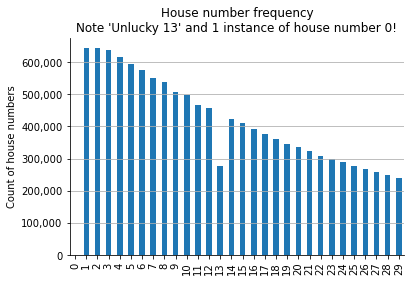

In [41]:
ax = df['paon_nbr'].value_counts(dropna=False).sort_index()[0:30].plot(kind='bar')

ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel("Count of house numbers");
ax.set_title("House number frequency\nNote 'Unlucky 13' and 1 instance of house number 0!")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y') # horizontal grid lines only

In [42]:
# Count numbers and
# add pretty formatting for
# NaN for all non-number entries
df['paon_nbr'].\
value_counts(dropna=False)[:5]\
.apply(lambda s: f"{s:,}") 

NaN    4,573,886
1        643,555
2        642,951
3        636,834
4        616,227
Name: paon_nbr, dtype: object

# Math speed

In [43]:
# no useful speedup on int
pd.options.compute.use_bottleneck=False
pd.options.compute.use_numexpr=False
%timeit df.price.mean()

35.4 ms ± 875 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [44]:
pd.options.compute.use_bottleneck=True
%timeit df.price.mean()

47.4 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [45]:
%timeit df.price.to_numpy().mean()

36.1 ms ± 693 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [46]:
%timeit np.nanmean(df.price.to_numpy())

36 ms ± 1.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [47]:
assert df['price'].dtype == 'int64'
df['price_f64'] = df.price.astype('float64')
assert (df.price == df.price_f64).all()
assert (df.price_f64.isnull() == False).all()

In [48]:
# affects float, much less for int
pd.options.compute.use_bottleneck=False
%timeit df.price_f64.mean()

67.4 ms ± 591 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [49]:
pd.options.compute.use_bottleneck=True
%timeit df.price_f64.mean()

48.8 ms ± 2.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [50]:
%timeit df.price_f64.to_numpy().mean()

19 ms ± 4.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [51]:
%timeit np.nanmean(df.price_f64.to_numpy())

167 ms ± 23.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [52]:
assert np.isnan(np.mean(   np.array([np.nan, 1, 2, 3])))
assert   2.0 == np.nanmean(np.array([np.nan, 1, 2, 3]))

# GroupBy apply on larger groups is slower than precalculating the logic and doing simpler groupby

In [53]:
f"{df_few_cols.memory_usage(deep=True).sum():,}"

'3,693,118,607'

In [54]:
def count_large(ser):
    """Expensive sales as a percentage"""
    return (ser > 500_000).sum() / ser.shape[0]

In [93]:
%%time

result = df_few_cols.groupby('county')['price'].apply(count_large)
result.sort_values(ascending=False).apply(lambda s: f"{s*100:0.1f}%")

CPU times: user 3.41 s, sys: 1.35 s, total: 4.76 s
Wall time: 4.77 s


county
WINDSOR AND MAIDENHEAD                 17.8%
SURREY                                 15.3%
GREATER LONDON                         15.1%
BOURNEMOUTH, CHRISTCHURCH AND POOLE    13.3%
BUCKINGHAMSHIRE                        12.9%
                                       ...  
MID GLAMORGAN                           0.0%
DYFED                                   0.0%
HUMBERSIDE                              0.0%
GWENT                                   0.0%
CLWYD                                   0.0%
Name: price, Length: 128, dtype: object

In [91]:
df_few_cols_copy = df_few_cols.copy()
df_few_cols_copy['price_large'] = df_few_cols_copy.price > 500_000
df_few_cols_copy.groupby('county')['price_large'].agg(['sum', 'size'])

,sum,size
county,,
AVON,4,16435
BATH AND NORTH EAST SOMERSET,6820,80803
BEDFORD,1999,34104
BEDFORDSHIRE,967,129278
BERKSHIRE,6,9248
...,...,...
WOKINGHAM,8228,81882
WORCESTERSHIRE,7262,270845
WREKIN,477,68864


In [92]:
%%time

df_few_cols_copy['price_large'] = df_few_cols_copy.price > 500_000
gpby_result = df_few_cols_copy.groupby('county')['price_large'].agg(['sum', 'size'])
result = gpby_result['sum'] / gpby_result['size'] # calculate Series of percentages
result.sort_values(ascending=False).apply(lambda s: f"{s*100:0.1f}%")

CPU times: user 2.49 s, sys: 877 ms, total: 3.37 s
Wall time: 3.37 s


county
WINDSOR AND MAIDENHEAD                 17.8%
SURREY                                 15.3%
GREATER LONDON                         15.1%
BOURNEMOUTH, CHRISTCHURCH AND POOLE    13.3%
BUCKINGHAMSHIRE                        12.9%
                                       ...  
MID GLAMORGAN                           0.0%
DYFED                                   0.0%
HUMBERSIDE                              0.0%
GWENT                                   0.0%
CLWYD                                   0.0%
Length: 128, dtype: object

In [99]:
gpby = df_few_cols_copy.groupby('county')['price_large']
gpby.ngroups, type(gpby)

(128, pandas.core.groupby.generic.SeriesGroupBy)

In [61]:
list(gpby.groups.keys())[:10]

['AVON',
 'BATH AND NORTH EAST SOMERSET',
 'BEDFORD',
 'BEDFORDSHIRE',
 'BERKSHIRE',
 'BLACKBURN WITH DARWEN',
 'BLACKPOOL',
 'BLAENAU GWENT',
 'BOURNEMOUTH',
 'BOURNEMOUTH, CHRISTCHURCH AND POOLE']

In [101]:
dir(gpby)

['__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_agg_examples_doc',
 '_agg_general',
 '_aggregate_multiple_funcs',
 '_aggregate_named',
 '_aggregate_with_numba',
 '_apply_allowlist',
 '_apply_filter',
 '_apply_to_column_groupbys',
 '_assure_grouper',
 '_bool_agg',
 '_builtin_table',
 '_concat_objects',
 '_constructor',
 '_cumcount_array',
 '_cython_agg_general',
 '_cython_table',
 '_cython_transform',
 '_dir_additions',
 '_dir_deletions',
 '_fill',
 '_get_cython_func',
 '_get_cythonized_result',
 '_get_in

In [62]:
gpby.groups['BATH AND NORTH EAST SOMERSET']

Int64Index([    5628,     7301,    25242,    26167,    27316,    35277,
               36654,    41439,    62903,    69139,
            ...
            25823257, 25823569, 25823573, 25823582, 25823586, 25823589,
            25834180, 25834187, 25834295, 25836599],
           dtype='int64', length=80803)

In [63]:
# get 0th item from this group and
# check against original DataFrame
item0 = gpby.groups['BATH AND NORTH EAST SOMERSET'][0]
print(f"First item is {item0}")
df_few_cols.loc[item0]

First item is 5628


county    BATH AND NORTH EAST SOMERSET
pt                                   S
date               1995-10-27 00:00:00
price                            62000
Name: 5628, dtype: object

# Rolling simple example

In [64]:
# Pandas example
# https://pandas.pydata.org/pandas-docs/stable/
#  user_guide/window.html#window-numba-engine   
data = pd.Series(range(1_000_000))
roll = data.rolling(10)
def f(x):
    return np.sum(x) + 5

In [65]:
%timeit roll.apply(f, engine='cython', raw=True)

5.27 s ± 144 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [67]:
%timeit -r 1 -n 1 roll.apply(f, engine='numba', raw=True)

963 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [68]:
# cache benefit for Numba
%timeit roll.apply(f, engine='numba', raw=True)

134 ms ± 644 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [69]:
engine_kwargs = {'nopython': True, 'nogil': False, 'parallel': True}
%timeit roll.apply(f, engine='numba', raw=True, engine_kwargs=engine_kwargs)

136 ms ± 2.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [66]:
# no obvious cache benefit for Cython
%timeit roll.apply(f, engine='cython', raw=True)

4.97 s ± 187 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [70]:
#%timeit 
# also very slow
# roll.apply(f, engine='cython', raw=False)

In [71]:
# BEWARE - the default is so slow I can't time it!
# %timeit roll.apply(f)

# Rolling with our data

15s numba vs 55s without for 2020-10-01 with 169k items

With 405k items and 2020-06-01, 2min no numba vs 34s with numba

Note that small windows with few (1000s?) items get a big win, big windows with 100k items seem to take forever no matter what we try


In [72]:
def conservative_estimate(ser):
    """With few samples take min price, else take median"""
    if ser.shape[0] > 10:
        return np.median(ser)
    else:
        return np.min(ser)
    
df_recent_dt = df_few_cols.set_index('date').\
               query('index > "2020-06-01"').\
               sort_index(ascending=True) # required for rolling
print(f"{df_recent_dt.shape[0]:,} rows for recent items with date as index")
df_recent_dt.head()

405,439 rows for recent items with date as index


,county,pt,price
date,,,
2020-06-02,GREATER MANCHESTER,T,100000
2020-06-02,NEWPORT,F,150000
2020-06-02,HERTFORDSHIRE,S,405000
2020-06-02,CENTRAL BEDFORDSHIRE,T,230000
2020-06-02,"BOURNEMOUTH, CHRISTCHURCH AND POOLE",D,265000


In [73]:
rolling = df_recent_dt.rolling(window="3d")
type(rolling)

pandas.core.window.rolling.Rolling

In [74]:
%%time
rolling['price'].apply(conservative_estimate)

CPU times: user 2min 14s, sys: 13.1 ms, total: 2min 14s
Wall time: 2min 14s


date
2020-06-02    100000.0
2020-06-02    100000.0
2020-06-02    100000.0
2020-06-02    100000.0
2020-06-02    100000.0
                ...   
2021-01-25    122500.0
2021-01-25    122500.0
2021-01-26    122500.0
2021-01-26     45000.0
2021-01-28     45000.0
Name: price, Length: 405439, dtype: float64

In [75]:
%%time
rolling['price'].apply(conservative_estimate, 
                       engine='numba', 
                       raw=True)

CPU times: user 37.3 s, sys: 69.5 ms, total: 37.4 s
Wall time: 37.3 s


date
2020-06-02    100000.0
2020-06-02    100000.0
2020-06-02    100000.0
2020-06-02    100000.0
2020-06-02    100000.0
                ...   
2021-01-25    122500.0
2021-01-25    122500.0
2021-01-26    122500.0
2021-01-26     45000.0
2021-01-28     45000.0
Name: price, Length: 405439, dtype: float64

In [76]:
%%time
# no benefit to allowing parallel
engine_kwargs = {'nopython': True, 
                 'nogil': True, 
                 'parallel': True}
rolling['price'].apply(conservative_estimate, 
                       engine='numba', 
                       raw=True, 
                       engine_kwargs=engine_kwargs)

CPU times: user 35.4 s, sys: 135 ms, total: 35.5 s
Wall time: 35.2 s


date
2020-06-02    100000.0
2020-06-02    100000.0
2020-06-02    100000.0
2020-06-02    100000.0
2020-06-02    100000.0
                ...   
2021-01-25    122500.0
2021-01-25    122500.0
2021-01-26    122500.0
2021-01-26     45000.0
2021-01-28     45000.0
Name: price, Length: 405439, dtype: float64

In [77]:
1/0

ZeroDivisionError: division by zero

# Experiment

try rolling

In [ ]:
df_recent_dt = df_recent.set_index('date')

In [ ]:
df_recent_dt.rolling(window="30d")['price'].mean()

In [ ]:
df_recent_dt.rolling(window="30d")['price'].mean().plot()

In [ ]:
def nbr_in_window(ser):
    #return np.percentile(ser.to_numpy(), interpolation='lower', q=50)
    return ser.shape[0]

# with shape it is up to 70k items from 2020-11-01
df_very_recent = df_recent_dt.query('index > "2020-11-01"')
df_res = df_very_recent.rolling(window="30d")['price'].apply(nbr_in_window)
df_res.plot()

In [ ]:
df_very_recent.shape, df_res.shape

In [ ]:
df_res.tail(10)

In [ ]:
df_recent_dt.query('index > "2019-01-01"').resample(rule='1D').size().plot()

In [ ]:
df_very_recent.resample(rule="1D").size().plot()

In [ ]:
def nbr_in_window(ser):
    #return np.percentile(ser.to_numpy(), interpolation='lower', q=50)
    return ser.shape[0]

# with shape it is up to 70k items from 2020-11-01
df_very_recent = df_recent_dt.query('index > "2020-09-01"')
#df_res.plot()

In [ ]:
%%time 

df_res = df_very_recent.rolling(window="30d")['price'].apply(nbr_in_window)

In [ ]:
%%time 

df_res = df_very_recent.rolling(window="30d")['price'].apply(nbr_in_window, engine='numba', raw=True)

In [ ]:
%%time 

engine_kwargs = {'nopython': True, 'nogil': True, 'parallel': True}

df_res = df_very_recent.rolling(window="30d")['price'].apply(nbr_in_window, engine='numba', raw=True, engine_kwargs=engine_kwargs)

In [ ]:
%%time 

df_res = df_very_recent.rolling(window="30d")['price'].count()

In [ ]:
def conservative_estimate(ser):
    #return np.percentile(ser.to_numpy(), interpolation='lower', q=50)
    if ser.shape[0] > 10:
        return np.median(ser)
    else:
        return np.min(ser)

# with shape it is up to 70k items from 2020-11-01
df_recent_dt.query('index > "2020-11-01"').rolling(window="30d")['price'].apply(conservative_estimate, engine='numba', raw=True)

In [ ]:
%%time

df_recent_dt.query('index > "2020-11-01"').rolling(window="30d")['price'].apply(conservative_estimate, engine='numba', raw=True)

In [ ]:
%%time 

df_recent_dt.query('index > "2020-11-01"').rolling(window="30d")['price'].apply(conservative_estimate, raw=True)

In [ ]:
from numba import njit

conservative_estimate_njit = njit(conservative_estimate)

df_recent_dt.query('index > "2020-11-01"').rolling(window="30d")['price'].apply(conservative_estimate_njit, engine='numba', raw=True)

In [ ]:
rolling = df_recent_dt.query('index > "2020-11-01"').rolling(window="30d")['price']


In [ ]:
rolling.apply(conservative_estimate_njit, engine='numba', raw=True)

In [ ]:
%%time

# 15s numba vs 55s without
def conservative_estimate(ser):
    #return np.percentile(ser.to_numpy(), interpolation='lower', q=50)
    if ser.shape[0] > 10:
        return np.median(ser)
    else:
        return np.min(ser)

# with shape it is up to 70k items from 2020-11-01
df_recent_dt.query('index > "2020-10-01"').rolling(window="3d")['price'].apply(conservative_estimate, engine='numba', raw=True)

In [ ]:
%%time
df_recent_dt.query('index > "2020-10-01"').rolling(window="3d")['price'].apply(conservative_estimate)

In [ ]:
rolling = df_recent_dt.query('index > "2020-10-01"').rolling(window="3d")['price']

In [ ]:
df_recent_dt.query('index == "2020-11-27"').shape

In [ ]:
# want 95% percentile if size is large, else